# Vamos a entrenar nuestro primer modelo!!!1!

### 1. Cargamos nuestro dataset y distintas librerías que van a ser útiles

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cancer_dataset = pd.read_csv('datos/cancer_data.csv')

### 2. Exploramos el dataset 
    
Ejercicio: ¿qué columnas tiene? ¿qué tipo de datos hay en cada columna? Utilizar gráficos de la clase anterior.

¿Cuales son las features y cual es la target? ¿Cuantos datos hay de cada clase?

In [15]:
# Hacer ej

### 3. Separación en train y test:

Si queremos evaluar qué tan bien funciona nuestro modelo, necesitamos separar una parte de los datos para no usarlos en el entrenamiento. De esta forma, podremos ver qué tan bien funciona el modelo con datos que no ha visto antes.

Preguntas: ¿Podemos usar el 50% de los datos para testear? ¿Y el 1%? ¿Y el 90%?

¿Se puede usar test para selección de hiperparámetros?

In [16]:
import sklearn.model_selection

X = cancer_dataset.drop(columns=['target'])
y = cancer_dataset['target']
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=4, test_size=TEST_SIZE)

Podemos ver los tamaños de los nuevos conjuntos:

In [17]:
print(f"X_train dimensión: {X_train.shape}")
print(f"y_train dimensión: {y_train.shape}")

print(f"X_test dimensión: {X_test.shape}")
print(f"y_test dimensión: {y_test.shape}")

X_train dimensión: (455, 30)
y_train dimensión: (455,)
X_test dimensión: (114, 30)
y_test dimensión: (114,)


### 4. Construcción de un modelo 

Para construir nuestro árbol creamos un objeto de la clase [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) a la que más tarde cambiaremos parámetros.

En este punto definimos que:
  - la profundidad máxima del árbol será 1 (esta bien?)
  - que el criterio para la selección en cada nodo sera `entropy`


In [18]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=1, criterion="entropy")

A entrenar el modelo!!!

In [19]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

### 5. Predicciones

Imaginemos que tenemos una instancia que queremos predecir. Podemos hacer una predicción con el modelo que entrenamos:

In [20]:
X_new = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])
print(f"X_new.shape: {X_new.shape}")

X_new.shape: (1, 30)


In [21]:
prediction = arbol.predict(X_new)
print(f"Predicción: {prediction}")

Predicción: [0]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
# predecimos los valores para las instacias que no vimos
y_pred = arbol.predict(X_test)

print(f"Predicciones:   {y_pred}\nValores reales: {y_test.to_numpy()}")
# Podemos calcular el accuracy (exactitud) comparando los valores predichos contra los reales, 
# para ello contamos cuántas coincidencias hubo y dividimos por la cantidad de comparaciones que hicimos:
print(f"Accuracy sobre el test set: {np.mean(y_pred == y_test)}") 

#También podemos invocar al método score que viene con los DecisionTreeClassifier
print(f"Accuracy sobre el test set: {arbol.score(X_test, y_test)}") 

print(f"Score sobre el training set: {arbol.score(X_train, y_train):.2f} ¿qué indica este número?")

Predicciones:   [1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 0 1]
Valores reales: [1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 0 1]
Accuracy sobre el test set: 0.8771929824561403
Accuracy sobre el test set: 0.8771929824561403
Score sobre el training set: 0.93 ¿qué indica este número?


In [23]:
print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=["0", "1"], index=["0", "1"]))

Matriz de confusión:


,0,1
0,28,6
1,8,72


### Resumen:

In [24]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=4, test_size=TEST_SIZE)

arbol = DecisionTreeClassifier(max_depth=1, criterion="entropy")
arbol.fit(X_train, y_train)

print(f"Score sobre el training set: {arbol.score(X_train, y_train):.2f} ¿qué indica este número?")
print(f"Score sobre el test set: {arbol.score(X_test, y_test):.2f}  ¿qué indica este número?")


Score sobre el training set: 0.93 ¿qué indica este número?
Score sobre el test set: 0.88  ¿qué indica este número?


### Ejercicio: 
- Crear un notebook nuevo y repetir el proceso con otro dataset (puede ser el de estrellas o cualquier otro que les interese)
- Pasos a seguir:
    - Cargar el dataset
    - Explorar el dataset
    - Separar en train y test
    - Entrenar un modelo (probar distintos hiperparámetros)
    - Printear el score en train y en test

## Extras:

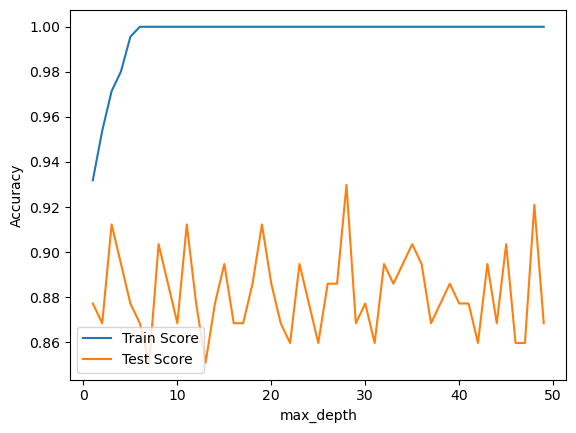

In [25]:
# make a plot of the accuracy vs max_depth
max_depths = range(1, 50)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    arbol.fit(X_train, y_train)
    train_scores.append(arbol.score(X_train, y_train))
    test_scores.append(arbol.score(X_test, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# !pip3 install pydotplus
# También instalar Graphviz. (en ubuntu: sudo apt-get install graphviz)

from six import StringIO  #pip3 install six
##### from sklearn.externals.six import StringIO  # opción para versiones más viejas de sklearn
from IPython.display import Image, display
import pydotplus
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import load_breast_cancer
breast_dataset = load_breast_cancer()

    
def dibujar_arbol(clf, c_name=breast_dataset.target_names, f_name=breast_dataset.feature_names):
    #
    # modo de uso: dibujar_arbol(arbol)
    #
    dot_data = StringIO()
    sklearn.tree.export_graphviz(clf, out_file = dot_data,  
                    filled = True, 
                    class_names = c_name,
                    feature_names = f_name,
                    special_characters = True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))


def explore_decision_tree_boundaries(max_depth=None, criterion="entropy", data_set=breast_dataset, cols=[0, 1]):
    n_classes, plot_colors, plot_step = 2, "ryb", 0.02
    fig=plt.figure(figsize=(10,7), dpi= 100, facecolor='w', edgecolor='k')
    
    X = data_set["data"][:, cols]
    y = data_set["target"]

    # Build and train Classifier
    tree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(1, 1, 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        tree,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=data_set.feature_names[cols[0]],
        ylabel=data_set.feature_names[cols[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=data_set.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

    plt.suptitle(f"Fronteras de decisión de un árbol de altura {tree.get_depth()} y #hojas: {tree.get_n_leaves()}")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")
    plt.show()
    
    dibujar_arbol(tree, f_name=[data_set.feature_names[cols[0]],data_set.feature_names[cols[1]]]
                 )

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
explore_decision_tree_boundaries(max_depth=5)